Copyright **`(c)`** 2025 Giovanni Squillero `<giovanni.squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free under certain conditions — see the [`license`](https://github.com/squillero/computational-intelligence/blob/master/LICENSE.md) for details.  

In [50]:
from itertools import accumulate
from icecream import ic
import numpy as np
from tqdm.auto import tqdm
from matplotlib import pyplot as plt

In [51]:
NUM_KNAPSACKS = 2
NUM_ITEMS = 10
NUM_DIMENSIONS = 2

In [52]:
VALUES = np.random.randint(0, 100, size=NUM_ITEMS)
WEIGHTS = np.random.randint(0, 100, size=(NUM_ITEMS, NUM_DIMENSIONS))
CONSTRAINTS = np.random.randint(0, 100 * NUM_ITEMS // NUM_KNAPSACKS, size=NUM_DIMENSIONS)

In [53]:
VALUES

array([39, 49, 79, 79, 56, 98, 20, 27, 43, 18], dtype=int32)

In [54]:
WEIGHTS

array([[29, 93],
       [ 2, 74],
       [75, 31],
       [ 7, 95],
       [46, 48],
       [47, 44],
       [28, 19],
       [61, 52],
       [ 4, 97],
       [99,  8]], dtype=int32)

In [105]:
CONSTRAINTS

array([614, 496])

In [56]:
# A random solution
solution = np.array(
    [np.random.random(NUM_ITEMS) < 0.5 for _ in range(NUM_KNAPSACKS)], dtype=np.bool
)

In [57]:
solution

array([[False, False,  True, False, False, False,  True,  True,  True,
         True],
       [False, False,  True, False,  True,  True,  True, False, False,
        False]])

In [58]:
# Check that the same object does not appear in multiple knapsacks
np.all(solution.sum(axis=0) <= 1)

np.False_

In [59]:
# Check if the solution is valid
all_knapsacks = np.any(solution, axis=0)
np.all(WEIGHTS[all_knapsacks].sum(axis=0) < CONSTRAINTS)

np.False_

## TEST PROBLEMS

In [106]:
# Problem 1:
rng = np.random.default_rng(seed=42)
NUM_KNAPSACKS = 3
NUM_ITEMS = 20
NUM_DIMENSIONS = 2
VALUES = rng.integers(0, 100, size=NUM_ITEMS)
WEIGHTS = rng.integers(0, 100, size=(NUM_ITEMS, NUM_DIMENSIONS))
CONSTRAINTS = rng.integers(0, 100 * NUM_ITEMS // NUM_KNAPSACKS, size=NUM_DIMENSIONS)
print("Values:", VALUES)
print("Weights:\n", WEIGHTS)
print("Constraints:", CONSTRAINTS)

Values: [ 8 77 65 43 43 85  8 69 20  9 52 97 73 76 71 78 51 12 83 45]
Weights:
 [[50 37]
 [18 92]
 [78 64]
 [40 82]
 [54 44]
 [45 22]
 [ 9 55]
 [88  6]
 [85 82]
 [27 63]
 [16 75]
 [70 35]
 [ 6 97]
 [44 89]
 [67 77]
 [75 19]
 [36 46]
 [49  4]
 [54 15]
 [74 68]]
Constraints: [614 496]


In [33]:
# Problem 2:
rng = np.random.default_rng(seed=42)
NUM_KNAPSACKS = 10
NUM_ITEMS = 100
NUM_DIMENSIONS = 10
VALUES = rng.integers(0, 1000, size=NUM_ITEMS)
WEIGHTS = rng.integers(0, 1000, size=(NUM_ITEMS, NUM_DIMENSIONS))
CONSTRAINTS = rng.integers(1000 * 2, 1000 * NUM_ITEMS // NUM_KNAPSACKS, size=NUM_DIMENSIONS)

In [34]:
# Problem 3:
rng = np.random.default_rng(seed=42)
NUM_KNAPSACKS = 100
NUM_ITEMS = 5000
NUM_DIMENSIONS = 100
VALUES = rng.integers(0, 1000, size=NUM_ITEMS)
WEIGHTS = rng.integers(0, 1000, size=(NUM_ITEMS, NUM_DIMENSIONS))
CONSTRAINTS = rng.integers(1000 * 10, 1000 * 2 * NUM_ITEMS // NUM_KNAPSACKS, size=NUM_DIMENSIONS)

RMHC

In [160]:
solution = np.full((NUM_KNAPSACKS, NUM_ITEMS), False)

In [89]:
solution

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False]])

In [ ]:
first_knapsack = solution[0]
first_knapsack = np.random.choice([True, False], size=NUM_ITEMS)


In [90]:
first_knapsack

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [110]:
def evaluate(knapsack):
    #print("Pesi primo zaino", np.sum(WEIGHTS[knapsack], axis=0))
    #print("Peso totale primo zaino", np.sum(WEIGHTS[knapsack], axis=0)[0])
    if all(np.sum(WEIGHTS[knapsack], axis=0) < CONSTRAINTS):
        return np.sum(VALUES[knapsack])
    else:
       return -1

In [92]:
print("Pesi primo zaino", np.sum(WEIGHTS[first_knapsack], axis=0))
print("Vincoli", CONSTRAINTS)

evaluate(first_knapsack)

Pesi primo zaino [0 0]
Vincoli [614 496]


np.int64(0)

In [93]:
MAX_STEPS = 10000
first_knapsack = np.full(NUM_ITEMS, False)
best_solution = first_knapsack
print("Soluzione iniziale:", best_solution)

Soluzione iniziale: [False False False False False False False False False False False False
 False False False False False False False False]


Soluzione iniziale: [False False False False False False False False False False False False
 False False False False False False False False]


100%|██████████| 10000/10000 [00:00<00:00, 24005.37it/s]
ic| evaluate(best_solution): np.int64(515)
ic| history.index(evaluate(best_solution)): 36


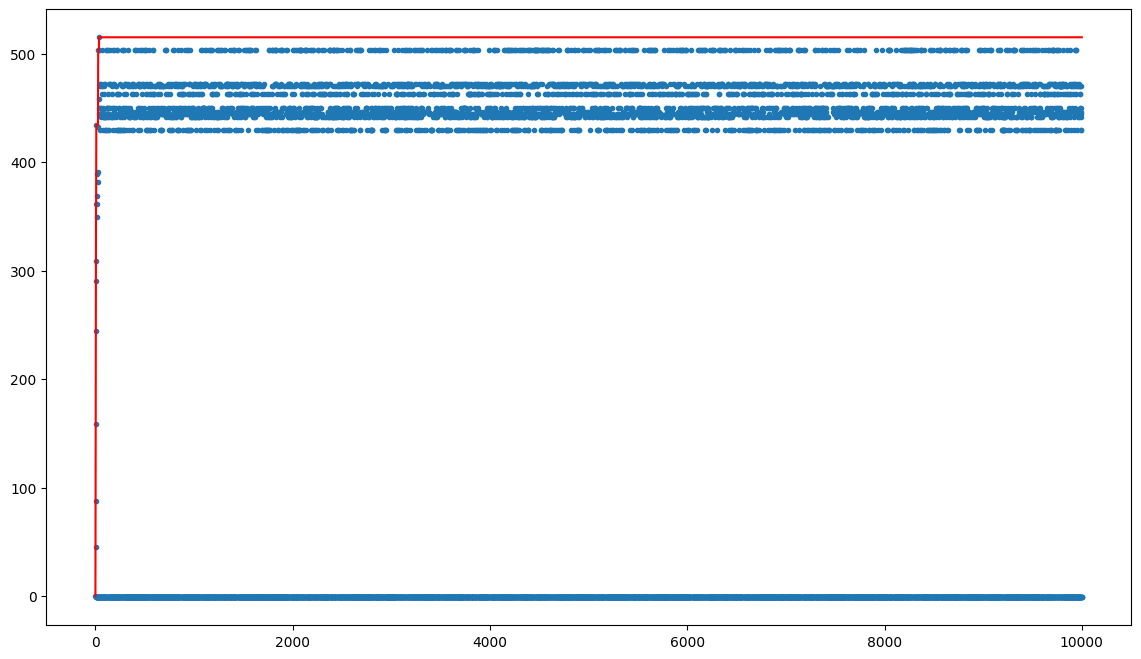

In [ ]:
history = [evaluate(best_solution)]
for n in tqdm(range(MAX_STEPS)):
    # TWEAK!
    new_solution = best_solution.copy()
    index = np.random.randint(0, NUM_ITEMS)
    new_solution[index] = not new_solution[index]

    history.append(evaluate(new_solution))
    if evaluate(new_solution) > evaluate(best_solution):
        best_solution = new_solution

# That's all...
ic(evaluate(best_solution))
ic(history.index(evaluate(best_solution)))

plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")

In [157]:
def tweak(solution, items_taken):
    new_solution = solution.copy()
    index = None
    while index is None or np.random.random() < 0.4:
        index = np.random.randint(0, NUM_ITEMS)
        if items_taken[index] == True:
            index = None
        else:
            new_solution[index] = not new_solution[index]
    #ic(new_solution, index)
    return new_solution, index


ic| items_taken: array([False, False, False, False, False, False, False, False, False,
                        False, False, False, False, False, False, False, False, False,
                        False, False])
ic| solution: array([[False, False, False, False, False, False, False, False, False,
                      False, False, False, False, False, False, False, False, False,
                      False, False],
                     [False, False, False, False, False, False, False, False, False,
                      False, False, False, False, False, False, False, False, False,
                      False, False],
                     [False, False, False, False, False, False, False, False, False,
                      False, False, False, False, False, False, False, False, False,
                      False, False]])


Knapsack 0 initial evaluation: 0


100%|██████████| 10000/10000 [00:00<00:00, 15558.04it/s]
ic| evaluate(best_solution): np.int64(753)
ic| history.index(evaluate(best_solution)): 7996
ic| best_solution: array([False,  True,  True, False, False,  True, False,  True, False,
                          False,  True,  True, False,  True,  True,  True, False, False,
                           True, False])


Knapsack 1 initial evaluation: 0


100%|██████████| 10000/10000 [00:00<00:00, 12090.37it/s]
ic| evaluate(best_solution): np.int64(296)
ic| history.index(evaluate(best_solution)): 81
ic| best_solution: array([False, False, False,  True,  True, False, False, False,  True,
                           True, False, False,  True, False, False, False,  True,  True,
                          False,  True])


Knapsack 2 initial evaluation: 0


100%|██████████| 10000/10000 [00:01<00:00, 6236.26it/s]
ic| evaluate(best_solution): np.int64(16)
ic| history.index(evaluate(best_solution)): 4
ic| best_solution: array([ True, False, False, False, False, False,  True, False, False,
                          False, False, False, False, False, False, False, False, False,
                          False, False])


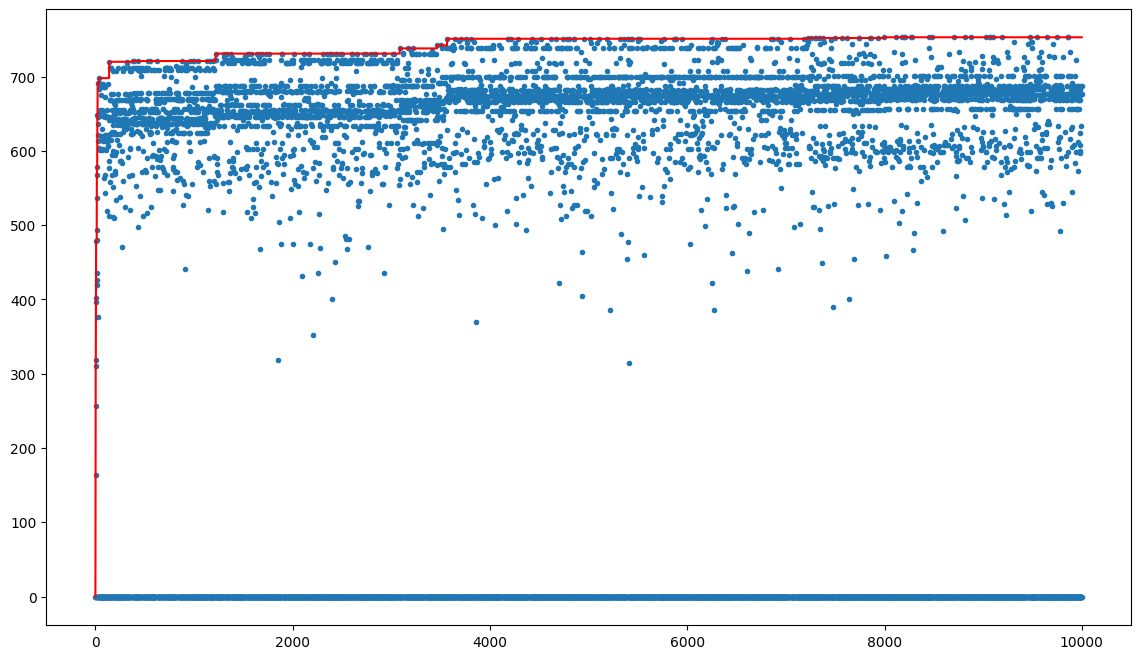

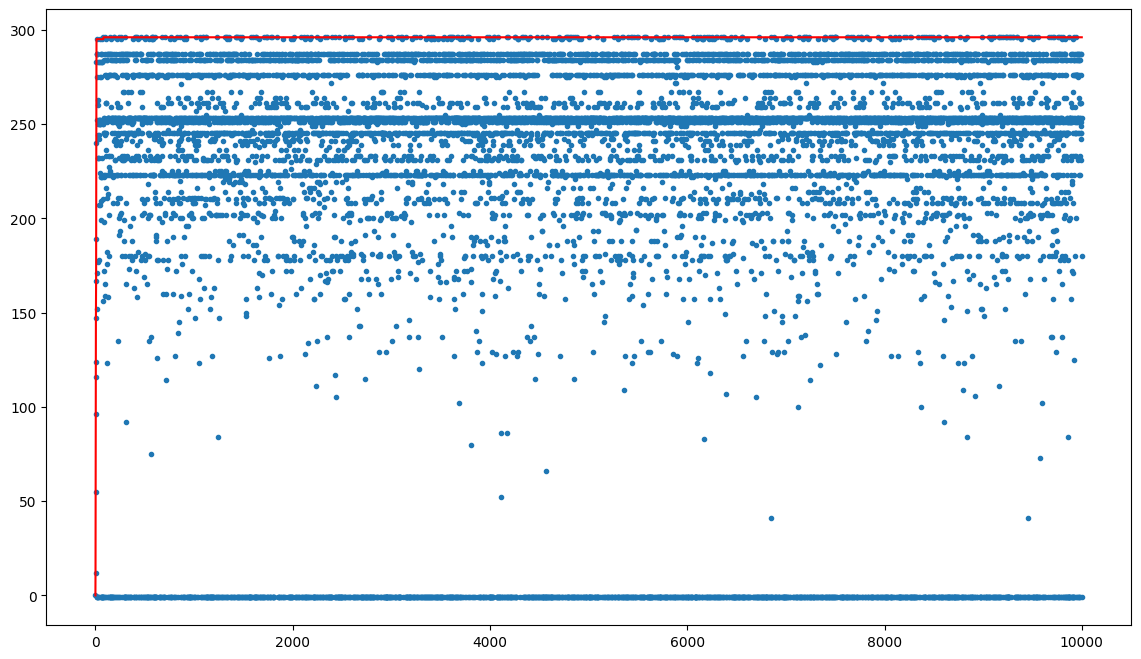

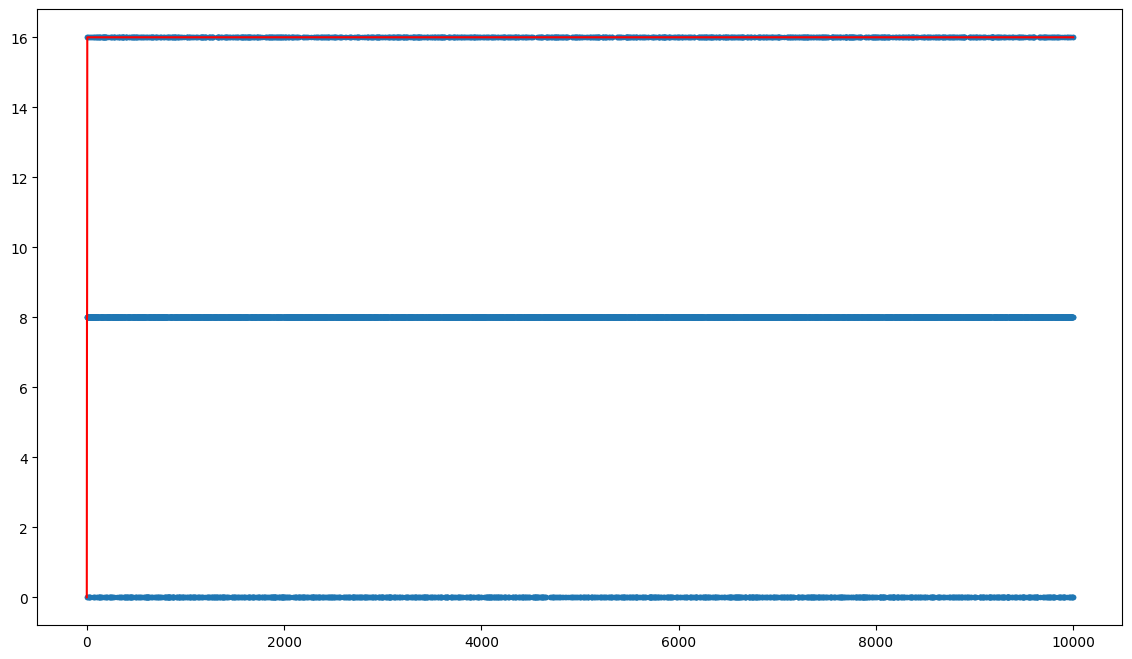

In [161]:
items_taken = np.full(NUM_ITEMS, False)
ic(items_taken)
ic(solution)

for knapsack_id in range(NUM_KNAPSACKS):
    knapsack = solution[knapsack_id]
    print(f"Knapsack {knapsack_id} initial evaluation:", evaluate(knapsack))
    best_solution = knapsack
    #best_solution = np.full(NUM_ITEMS, False)

    history = [evaluate(best_solution)]
    for n in tqdm(range(MAX_STEPS)):
        new_solution, index_item = tweak(best_solution, items_taken)
        history.append(evaluate(new_solution))
        if evaluate(new_solution) > evaluate(best_solution):
            best_solution = new_solution
            #items_taken[index_item] = True #problema non è esclusivo
            #ic(index_item)
            #print(item_taken)

    items_taken = items_taken + best_solution
    #ic(items_taken)
    solution[knapsack_id] = best_solution

    # That's all...
    ic(evaluate(best_solution))
    ic(history.index(evaluate(best_solution)))

    ic(best_solution)

    plt.figure(figsize=(14, 8))
    plt.plot(
        range(len(history)),
        list(accumulate(history, max)),
        color="red",
    )
    _ = plt.scatter(range(len(history)), history, marker=".")

In [96]:
evaluate(best_solution)

np.int64(766)

In [97]:
CONSTRAINTS

array([614, 496])

In [113]:
print(np.sum(WEIGHTS[best_solution], axis=0))
print("Vincoli", CONSTRAINTS)

[601 495]
Vincoli [614 496]


In [126]:
solution

array([[False,  True, False, False, False,  True, False,  True, False,
        False,  True,  True, False,  True,  True,  True,  True,  True,
         True, False],
       [False,  True,  True, False, False,  True, False,  True, False,
        False,  True,  True, False,  True,  True,  True, False, False,
         True, False],
       [False,  True,  True, False, False,  True, False,  True, False,
        False, False,  True,  True,  True, False,  True,  True,  True,
         True, False]])